Simulert 1001 tidssteg, DT=1.00000e-03, DX=0.100, metode=LW


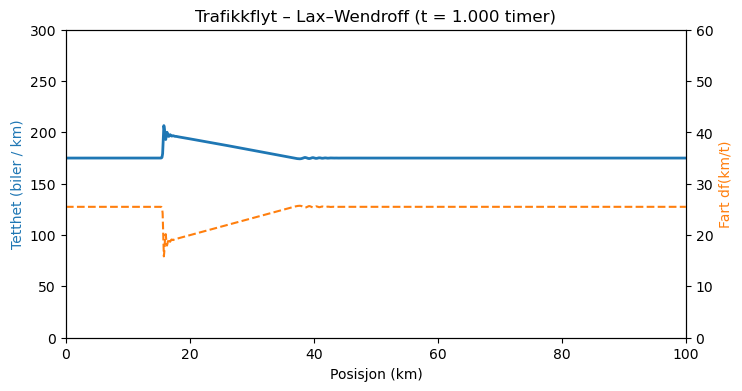

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# -----------------------------
# Parametere
# -----------------------------

case = 'ferge' # 'ferge', 'rush', 'politi'
method = 'LW'  # 'LF', 'LW', 'mean', 'CD'

L = 100.0
DX = 0.1

Ttot = 1.0
DT = DX/100

X = np.arange(0.0, L + DX/2, DX) 
N = len(X)

def f(u):
    return 50*u*(1 - (u/250)**2)

def df(u):
    return 50*(1 - 3*u**2/62500)

def v(u):
    return 50*(1-(u/250)**2)


def initial(X, case):
    if case == 'ferge':
        u = np.zeros_like(X)
        x1 = np.where(X > 50)[0][0]
        u[:x1] = 249.0
    elif case == 'rush':
        u = 175.0 * np.ones_like(X)
        x1 = np.where(X > 50)[0][0]
        x2 = np.where(X > 60)[0][0]
        u[x1:x2] += 25.0
    elif case == 'politi':
        u = 25.0 * np.ones_like(X)
        x1 = np.where(X > 50)[0][0]
        x2 = np.where(X > 60)[0][0]
        u[x1:x2] += 25.0
    return u


def finn_flux(u, DX, DT, method):
    flux = np.zeros(len(u) + 1)

    if method == 'LF':
        for i in range(1, len(flux) - 1):
            flux[i] = 0.5*(f(u[i]) + f(u[i-1])) - 0.5*(DX/DT)*(u[i] - u[i-1])
    elif method == 'LW':
        u_half = np.zeros(len(u)+1)
        for i in range(0, N-1):
            u_half[i+1] = 0.5*(u[i] + u[i+1]) - 0.5*(DT/DX)*(f(u[i+1]) - f(u[i]))
        flux = f(u_half)
    elif method == 'mean':
        for i in range(1, len(flux) - 1):
            flux[i] = 0.5*(f(u[i]) + f(u[i-1]))

    return flux

def LW_flux(u, DX, DT):
    flux = np.zeros(len(u) + 1)

    return flux


u0 = initial(X, case) 
u_list = [u0.copy()]

# -----------------------------
# Tidsintegrasjon
# -----------------------------
u = u0.copy()
T = 0.0
step = 0
while T < Ttot - 1e-12:

    if method == 'CD':
        u[1:-1] -= DT/(2*DX) * (u[2:] - u[:-2])
    else:
        flux = finn_flux(u, DX, DT, method)
        u = u - (DT/DX)*(flux[1:] - flux[:-1])

    u[0], u[-1] = u0[0], u0[-1]

    u_list.append(u.copy())

    T += DT
    step += 1

print(f"Simulert {len(u_list)} tidssteg, DT={DT:.5e}, DX={DX:.3f}, metode={method}")

# -----------------------------
# Animasjon med to akser
# -----------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()  # høyre akse

line_u, = ax1.plot(X, u_list[0], 'C0', lw=2, label='Tetthet u(x)')
line_v, = ax2.plot(X, v(u_list[0]), 'C1--', lw=1.5, label='Fart df(u)')

ax1.set_xlim(0, L)
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 60)
ax1.set_xlabel('Posisjon (km)')
ax1.set_ylabel('Tetthet (biler / km)', color='C0')
ax2.set_ylabel('Fart df(km/t)', color='C1')

title = 'Lax–Friedrichs' if method == 'LF' else 'Lax–Wendroff'
ax1.set_title(f'Trafikkflyt – {title}')

frame_step = 10
indices = range(0, len(u_list), frame_step)

def update(frame_idx):
    i = indices[frame_idx]
    u = u_list[i]
    line_u.set_data(X, u)
    line_v.set_data(X, v(u))
    ax1.set_title(f"Trafikkflyt – {title} (t = {i*DT:.3f} timer)")
    return (line_u, line_v)

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(indices),
    interval=40,
    blit=True
)

HTML(anim.to_jshtml())

In [ ]:
# I denne filen skal vi løse grunntvannslikningene 
# H_t + (Hu)_x = 0
# (Hu)_t + (H*u^2)_x + Hg eta_x = 0

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# definerer et domene
g = 9.81
DX = 0.5
DT = 0.02
TMAX = 200

# La bunnen være flat de første 500 metrene, så slak bakke til 2 meter dybde. 
L0 = 500
h0 = -50 
A = h0 * np.ones(int(L0/DX))
 
h1 = -0.1
slope1 = 1/10
B = np.linspace(h0, h1, int((h1-h0)/slope1/DX))

L2 = 500 
h2 = -0.1 
C = h2 * np.ones(int(L2/DX))

h3 = h0
slope3 = -1/10
D = np.linspace(h2, h3, int((h3-h2)/slope3/DX))

h4 = h0 
L4 = 100
E = h4 * np.ones(int(L4/DX))

h = np.concatenate((A, B, C, D, E))
X = np.arange(0, len(h)*DX, DX)
Nx = len(X)





ArgumentError: ArgumentError: Package numpy not found in current path.
- Run `import Pkg; Pkg.add("numpy")` to install the numpy package.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# I denne filen skal vi løse grunntvannslikningene 
# H_t + (Hu)_x = 0
# (Hu)_t + (H*u^2 + 0.5gH^2)_x + Hgh_x = 0
# Her prøver vi på sentral differanser i rom, og euler fremover i tid.

# definerer et domene
g = 9.81
DX = 2
DT = 0.02
TMAX = 200

# La bunnen være flat de første 500 metrene, så slak bakke til 2 meter dybde. 
L0 = 500
h0 = -50 
A = h0 * np.ones(int(L0/DX))
 
h1 = -0.1
slope1 = 1/10
B = np.linspace(h0, h1, int((h1-h0)/slope1/DX))

L2 = 500 
h2 = -0.1 
C = h2 * np.ones(int(L2/DX))

h3 = h0
slope3 = -1/10
D = np.linspace(h2, h3, int((h3-h2)/slope3/DX))

h4 = h0 
L4 = 100
E = h4 * np.ones(int(L4/DX))

h = np.concatenate((A, B, C, D, E))
X = np.arange(0, len(h)*DX, DX)
Nx = len(X)


# Definer startverdier - en "hump" ved start
eta = np.zeros(np.shape(X))
eta[10:210] = 1*np.exp(-0.0004*(np.arange(10,210)-105)**2)
H = eta - h
u = np.sqrt(g/H) * eta 

Hu = H * u 


# Tidsloop
eta_list = [H + h]
T = 0

while T < TMAX:

    # --- Sikre positiv H
    H = np.maximum(H, 1e-6)
    
    # --- CFL
    c_max = np.max(np.abs(u) + np.sqrt(g*H))
    DT = 0.5 * DX / c_max

    # --- Ghost cells for periodiske BC
    H_ext = np.concatenate(([H[-1]], H, [H[0]]))
    Hu_ext = np.concatenate(([Hu[-1]], Hu, [Hu[0]]))
    h_ext = np.concatenate(([h[-1]], h, [h[0]]))

    # --- Romlige deriverte (sentral differanse)
    Hu_x = (Hu_ext[2:] - Hu_ext[:-2]) / (2*DX)
    Huu_x = ((Hu_ext[2:]**2 / H_ext[2:]) - (Hu_ext[:-2]**2 / H_ext[:-2])) / (2*DX)
    
    # --- kilde ledd
    h_x = (h_ext[2:] - h_ext[:-2]) / (2*DX)
    Hu_source = g * 0.5 * (H_ext[1:-1] + H_ext[2:]) * (h_ext[2:] - h_ext[1:-1]) / DX

    # --- Oppdater H og Hu
    H_new = H - DT * Hu_x
    Hu_new = Hu - DT * Huu_x - DT * Hu_source

    H, Hu = H_new, Hu_new
    H = np.maximum(H, 1e-6)   # sikre positiv H

    u = Hu / H
    eta = H + h

    T += DT

    # Lagre havoverflate
    if T % int(1) <= DT:   # lagrer hvert sekund
        eta_list.append(eta.copy())



C:\Users\andre\AppData\Local\Temp\ipykernel_21932\3107260487.py:71: RuntimeWarning: overflow encountered in divide
  Huu_x = ((Hu_ext[2:]**2 / H_ext[2:]) - (Hu_ext[:-2]**2 / H_ext[:-2])) / (2*DX)
C:\Users\andre\AppData\Local\Temp\ipykernel_21932\3107260487.py:71: RuntimeWarning: invalid value encountered in subtract
  Huu_x = ((Hu_ext[2:]**2 / H_ext[2:]) - (Hu_ext[:-2]**2 / H_ext[:-2])) / (2*DX)
C:\Users\andre\AppData\Local\Temp\ipykernel_21932\3107260487.py:78: RuntimeWarning: invalid value encountered in multiply
  H_new = H - DT * Hu_x
C:\Users\andre\AppData\Local\Temp\ipykernel_21932\3107260487.py:79: RuntimeWarning: invalid value encountered in multiply
  Hu_new = Hu - DT * Huu_x - DT * Hu_source


In [ ]:
# Her prøver vi på endelig volum metoder i rom (lax-friedrich og lax-wendroff), og euler fremover i tid.


# Definer startverdier - en "hump" ved start
eta = np.zeros(np.shape(X))
eta[10:210] = 1*np.exp(-0.0004*(np.arange(10,210)-105)**2)
H = eta - h
u = np.sqrt(g/H) * eta 

Hu = H * u 


def LF_flux(H, u, h, Hu, DT, DX, g=9.81):
    """Beregner fluxer for grunntvannslikningene med Lax–Friedrich på kantene av hver celle.
       Periodiske BC's er tatt med i beregningen. Dvs at F[0] og F[n+1] er samme tall. """
    n = len(H)
    F1 = np.zeros(n+1)
    F2 = np.zeros(n+1)

    # Utvid periodisk
    H_ext = np.concatenate(([H[-1]], H, [H[0]]))
    u_ext = np.concatenate(([u[-1]], u, [u[0]]))
    Hu_ext = np.concatenate(([Hu[-1]], Hu, [Hu[0]]))
    h_ext = np.concatenate(([h[-1]], h, [h[0]]))
    eta_ext = H_ext + h_ext


    # Fluksene for hver celle
    f1 = H_ext * u_ext
    f2 = H_ext * u_ext**2 + 0.5 * g * H_ext**2

    # Lax–Friedrichs numerisk fluks i cellekantene
    for i in range(1, n+2):
        F1[i-1] = 0.5 * (f1[i-1] + f1[i]) - 0.5 * DX/DT * (H_ext[i] - H_ext[i-1])
        F2[i-1] = 0.5 * (f2[i-1] + f2[i]) - 0.5 * DX/DT * (Hu_ext[i] - Hu_ext[i-1])
    return F1, F2


def LW_flux(H, u, h, Hu, DT, DX, g=9.81):
    """
    Beregner fluxer for grunntvannslikningene med Lax–Wendroff (to-stegs) på kantene av hver celle.
    Periodiske BC's er tatt med i beregningen.
    """

    n = len(H)

    # Utvid periodisk
    H_ext = np.concatenate(([H[-1]], H, [H[0]]))
    Hu_ext = np.concatenate(([Hu[-1]], Hu, [Hu[0]]))
    h_ext = np.concatenate(([h[-1]], h, [h[0]]))
    u_ext = Hu_ext / H_ext  # sikkerhet: H_ext > 0

    # Beregn fluxene for hver celle
    f1 = Hu_ext
    f2 = Hu_ext * u_ext + 0.5 * g * H_ext**2

    # --- Prediktor-steg: halvstegs flux på cellekanter
    H_half = np.zeros(n+1)
    Hu_half = np.zeros(n+1)

    for i in range(n+1):
        H_half[i] = 0.5 * (H_ext[i] + H_ext[i+1]) - 0.5 * DT/DX * (f1[i+1] - f1[i])
        Hu_half[i] = 0.5 * (Hu_ext[i] + Hu_ext[i+1]) - 0.5 * DT/DX * (f2[i+1] - f2[i])

    # Beregn flux fra halvstegs verdiene
    u_half = Hu_half / H_half
    f1_half = Hu_half
    f2_half = Hu_half * u_half + 0.5 * g * H_half**2

    # --- Fullstegs flux på cellene
    F1 = np.zeros(n+1)
    F2 = np.zeros(n+1)
    for i in range(n+1):
        F1[i] = f1_half[i]
        F2[i] = f2_half[i]

    # Periodiske BC
    F1[0] = F1[-1]
    F2[0] = F2[-1]

    return F1, F2




# --------------------------
# Tidsloop
# --------------------------
eta_list = [H + h]  # lagrer havoverflate

T = 0
while T < TMAX:    

    # CFL condition
    DT = 0.5* DX/np.amax(u + np.sqrt(g*H))

    Hu = H*u

    # Flukser
    F1, F2 = LF_flux(H, u, h, Hu, DT, DX, g)

    # ----- Løser masselikningen
    H += -DT/DX * (F1[1:] - F1[:-1])

    # ----- Løser bevegelsesmengdelikningen (bruk F2!)
    Hu += -DT/DX * (F2[1:] - F2[:-1])

    # ----- Source term (sentral differanse)
    h_x = np.zeros_like(h)
    h_x[1:-1] = (h[2:] - h[:-2]) / (2*DX)
    h_x[0] = (h[-1] - h[1]) / (2*DX)
    h_x[-1] = (h[0] - h[-2]) / (2*DX)

    Hu += -DT * g * H * h_x

    # ---- Oppdaterer verdier
    u = Hu / H
    eta = H + h
    T += DT

    # Lagre havoverflate
    if T % int(1) <= DT:   # lagrer hvert sekund
        eta_list.append(eta.copy())





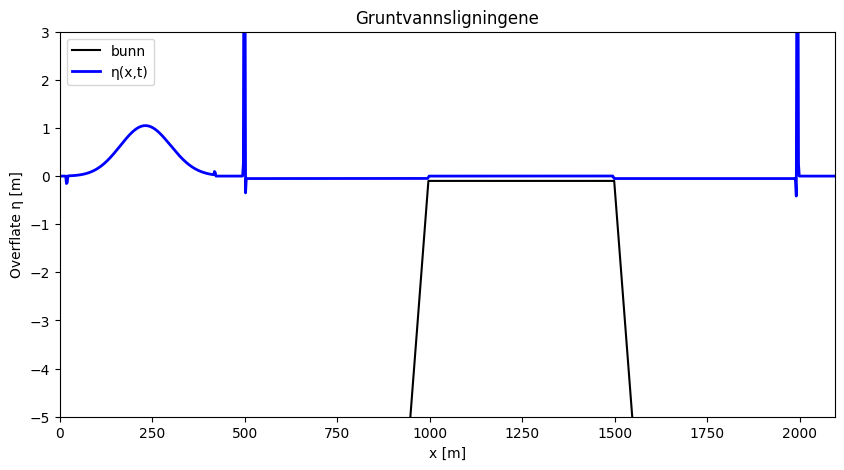

In [ ]:
from matplotlib import animation
from IPython.display import HTML

# --- Oppsett for animasjonen ---
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(X.min(), X.max())
ax.set_ylim(-5, 3)
ax.set_xlabel('x [m]')
ax.set_ylabel('Overflate η [m]')
ax.set_title('Gruntvannsligningene')

# Tegn bunnprofil
ax.plot(X, h, 'k', label='bunn')
line, = ax.plot([], [], 'b', lw=2, label='η(x,t)')
ax.legend()

# --- Funksjon for å oppdatere animasjonen ---
def update(frame):
    line.set_data(X, eta_list[frame])
    return (line,)

# --- Lag animasjonen ---
anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(eta_list),
    interval=40,   # millisekunder mellom frames (f.eks. 40 → 25 fps)
    blit=True
)

# --- Vis i Jupyter ---
HTML(anim.to_jshtml())


[array([0., 0., 0., ..., 0., 0., 0.], shape=(2595,))]